True
Unnamed: 0                                                                     117
job_code                                                          29L70ZQP65292140
aircraft                                                                         1
transaction_code                                                                11
malfunction_code                                                               170
action_taken_code                                                                Z
description_of_problem            Chipped or worn paint identified on the aircraft
correction_of_problem                               Repair chip and paint the area
received_date                                                             10/18/16
completion_date                                                           10/21/16
corrosion                                                                      NaN
bare_metal                                                                     NaN

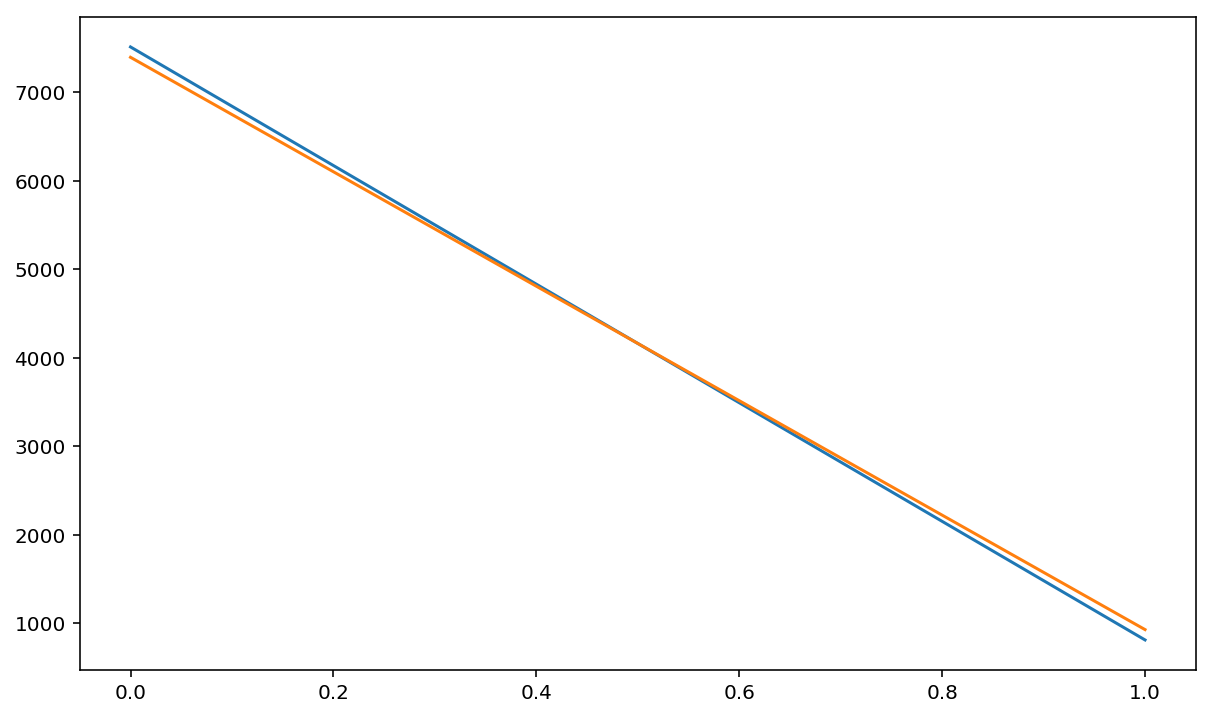

In [6]:
 # import dependencies
import os, io, requests, zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.figure_factory as ff

plt.rcParams['figure.figsize'] = 10,6
import warnings 
warnings.filterwarnings("ignore")


import psycopg2
import pandas.io.sql as sqlio

def findChippedPaint(n):
    return ("paint" in str(n['description_of_problem']) or "worn" in str(n['description_of_problem']) or "bare metal" in str(n['description_of_problem']))

def findCorrosion(n):
    return ("C" in str(n['malfunction_code']) or "corrosion" in str(n['description_of_problem']) or n['corrosion']=="Yes")


data = pd.read_csv("HtM_MAF_Data_Aircraft1.csv") 
data.head()

print(findChippedPaint(data.iloc[117]))
print(data.iloc[117])

data['chipped_paint'] = data.apply(findChippedPaint, axis=1)
data['New_corrosion'] = data.apply(findCorrosion, axis=1)

data.sort_values(by=['received_date'], inplace=True)

plt.plot(data['chipped_paint'].value_counts())
plt.plot(data['New_corrosion'].value_counts())
data.to_csv("PaintVsCorrosionAircraft1.csv")
plt.show()